# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [189]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm 

In [190]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [191]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [192]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [193]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)  

157.0

In [194]:
len(data[data.race=='b'].call)

2435

In [195]:
sucess_b = sum(data[data.race=='b'].call) / len(data[data.race=='b'].call)
print('rate of success for black sounding names is: '+ str(sucess_b))

rate of success for black sounding names is: 0.06447638603696099


In [196]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [197]:
sucess_w = sum(data[data.race=='w'].call)/len(data[data.race=='w'].call)
print('rate of success for white sounding names is: '+ str(sucess_w))

rate of success for white sounding names is: 0.09650924024640657


In [198]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

sum(data.race.isnull())   

# What test is appropriate for this problem? Does CLT apply? 
# the sample size n>30 and the sample is less than 10% of the population as a whole 
# What are the null and alternate hypotheses?

# CLT applies since we have 4870 entries and the n > 30 and the sample is definitely 10% of the population as a whole. 
# H_0 : race has no effect in getting interview calls   mean_w - mean_b = 0
# H_a : race has an effect in getting interview calls   mean_w - mean_b != 0

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [73]:
w = data[data.race=='w']
b = data[data.race=='b']

In [90]:
len(w)

2435

In [91]:
len(b)

2435

In [103]:
data.call.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: call, dtype: float32

In [84]:
w.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,...,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,3.620945,3.664476,7.856263,0.054209,0.408624,0.092402,0.450103,214.530595,3.475154,0.558111,...,0.106776,0.436961,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.696609,1.219345,5.079228,0.226477,0.491681,0.289653,0.497606,148.255302,2.033334,0.496714,...,0.308889,0.496116,0.259681,0.275874,0.171693,0.278955,0.410183,0.442879,0.361809,0.371337
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,26.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
b.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,...,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,3.616016,3.658316,7.829569,0.051335,0.414374,0.101848,0.445996,216.744969,3.487885,0.560986,...,0.106776,0.437372,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.733060,1.219150,5.010764,0.220725,0.492715,0.302511,0.497177,148.021857,2.043125,0.496369,...,0.308889,0.496160,0.259681,0.275874,0.171693,0.278955,0.410183,0.442879,0.361809,0.371337
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
#w.info()

In [145]:
#w.info()

In [106]:
print(sum(w.call))  
print(len(w.call))

235.0
2435


In [104]:
len(data)

4870

In [146]:
# Your solution to Q3 here 
# Compute margin of error, confidence interval, and p-value. 
# Try using both the bootstrapping and the frequentist statistical approaches.

In [201]:
mean_w = np.mean(w).call
std_w = np.std(w).call
print('The mean of getting call interviews for white sounding names is: ' + str(mean_w))
print('The standard deviation of getting call interviews for white sounding names is: ' + str(std_w))

The mean of getting call interviews for white sounding names is: 0.09650924
The standard deviation of getting call interviews for white sounding names is: 0.29528487


In [202]:
mean_b = np.mean(b).call
std_b = np.std(b).call
print('The mean of getting call interviews for black sounding names is: ' + str(mean_b))
print('The standard deviation of getting call interviews for black sounding names is: ' + str(std_b))

The mean of getting call interviews for black sounding names is: 0.064476386
The standard deviation of getting call interviews for black sounding names is: 0.24559902


In [207]:
sigma_w = np.sqrt(mean_w*(1-mean_w)/len(w.call))
print('Standard Deviation of the white sounding names for success calls is: ' + str(sigma_w))

Standard Deviation of the white sounding names for success calls is: 0.005984072187024548


In [208]:
sigma_b = np.sqrt(mean_b*(1-mean_b)/len(b.call))
print('Standard Deviation of the white sounding names for success calls is: ' + str(sigma_b))

Standard Deviation of the white sounding names for success calls is: 0.004977121431156429


In [209]:
sigma = np.sqrt(sigma_w ** 2 + sigma_b**2)
print('Standard Deviation of the success calls is: ' + str(sigma))

Standard Deviation of the success calls is: 0.00778337058606343


In [210]:
mean = mean_w - mean_b
print('Mean of the success calls is: ' + str(mean))

Mean of the success calls is: 0.032032855


In [211]:
z_total = mean/sigma
print('z-value of the success calls is: ' + str(z_total))

z-value of the success calls is: 4.115550519002299


In [212]:
margin_total = 1.96 * sigma
print('Margin of Error for success calls is: ' + str(margin_total))

Margin of Error for success calls is: 0.015255406348684322


In [213]:
CI_total = [mean - margin_total, mean + margin_total]
print('confidence interval for success calls is: ' + str(CI_total))

confidence interval for success calls is: [0.016777448506376254, 0.0472882612037449]


In [239]:
p_total = 1-stats.norm.cdf(abs(z_total))
print('p_value for success calls is: ' + str(p_total *2))  # it's both sides of the tails

p_value for success calls is: 3.8625638129063944e-05


In [241]:
def permutation_sample(d1, d2):  # sample for b and w
    d = np.concatenate((d1, d2))
    perm_d = np.random.permutation(d)
    return perm_d[:len(d1)], perm_d[len(d1):]

In [242]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [243]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(w.call, b.call)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(w.call, b.call, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


In [244]:
conf_int_bs_repl = np.percentile(perm_replicates, [0.5, 99.5]) 
print(conf_int_bs_repl)


[-0.01971253  0.01971664]


In [219]:
#z_crit_w = 1.96 * std_w
ci_w = np.array([mean_w - z_crit_w,  mean_w + z_crit_w ])  #z_crit_w
print('The critical z-value is: '+ str(z_crit_w))
print('The 95% confidence interval is between: '+ str(ci_w))
    

The critical z-value is: 0.578758339881897
The 95% confidence interval is between: [-0.4822491   0.67526758]


In [220]:
import scipy.special  

In [221]:
z_crit_b = 1.96 * std_b
ci_b = np.array([mean_b - z_crit_b,  mean_b + z_crit_b])
print('The critical z-value is: '+ str(z_crit_b))
print('The 95% confidence interval is between: '+ str(ci_b))
p_values = stats.norm.sf(abs(z_crit_b))
p_valuB = 1-stats.norm.cdf(abs(z_crit_b))   #this is me checking various ways
p_values_b = 1 - scipy.special.ndtr(z_crit_b)
print(p_values)    
print(p_values_b)
print(p_valuB)

The critical z-value is: 0.481374072432518
The 95% confidence interval is between: [-0.41689769  0.54585046]
0.31512533029348216
0.3151253302934822
0.3151253302934822


In [222]:
z_crit_w = 1.96 * std_w
ci_w = np.array([mean_w - z_crit_w,  mean_w + z_crit_w])
print('The critical z-value is: '+ str(z_crit_w))
print('The 95% confidence interval is between: '+ str(ci_w))
p_value = stats.norm.sf(abs(z_crit_w))
p_values_w = 1 - scipy.special.ndtr(z_crit_w)
print(p_value)    
print(p_values_w)

The critical z-value is: 0.578758339881897
The 95% confidence interval is between: [-0.4822491   0.67526758]
0.2813761224687268
0.2813761224687268


In [223]:
result_bs = stats.ttest_ind(bs_replicates_w, bs_replicates_b, equal_var=True)
print(result_bs)

Ttest_indResult(statistic=410.6785349815058, pvalue=0.0)


In [224]:
mean_d = mean_w - mean_b
std_d = np.sqrt(std_w **2 /2435+ std_b ** 2/2435)

print('The mean difference bwteen white and black success call is: ' + str(mean_d))
print('The standard deviation bwteen white and black success call is: ' + str(std_d))

The mean difference bwteen white and black success call is: 0.032032855
The standard deviation bwteen white and black success call is: 0.007783308359923415


In [225]:
result = stats.ttest_ind(w.call, b.call, equal_var=False)   # for 2 independent samples 
print(print('z-statistic has a z_val of: ' + str(result[0]) + ' and a p_value of: ' + str(result[1])))


z-statistic has a z_val of: 4.114705290861751 and a p_value of: 3.942941513645935e-05
None


In [180]:
# since the p_value is very small, we can reject the H_0

In [176]:
len(w) + len(b)


4870

In [177]:
z_val=(mean_w-mean_b)/(np.sqrt(std_w**2/len(w) + std_b**2/len(b)))
z_val

4.115583422082968

In [179]:
from statsmodels.distributions.empirical_distribution import ECDF
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot

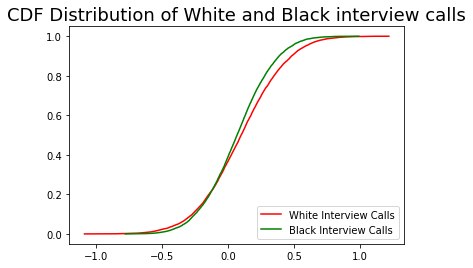

In [181]:
samples_w = np.random.normal(mean_w, std_w, size = 10000)
ecdf_w = ECDF(samples_w)
plt.plot(ecdf_w.x,ecdf_w.y,  color = 'r')
samples_b = np.random.normal(mean_b, std_b, size = 10000)
ecdf_b = ECDF(samples_b)
plt.plot(ecdf_b.x,ecdf_b.y,  color = 'g')
#temp_norm = np.random.normal(np.mean(temp), np.std(temp), 100000)
#ecdf = ECDF(temp_norm)
#ecdf = ECDF(data)
#plt.plot(ecdf.x,ecdf.y)
plt.legend(('White Interview Calls', 'Black Interview Calls'), loc='lower right')
plt.title('CDF Distribution of White and Black interview calls', fontsize=18)
plt.show()

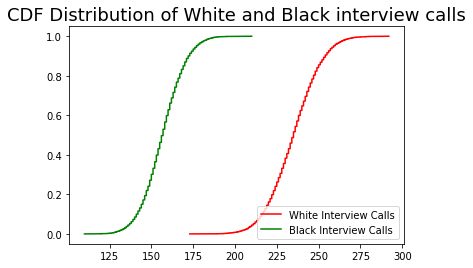

In [246]:
sample_w = np.random.binomial(len(w), sucess_w, size = 10000)
ecdf_w_0 = ECDF(sample_w)
plt.plot(ecdf_w_0.x,ecdf_w_0.y,  color = 'r')
sample_b = np.random.binomial(len(b), sucess_b, size = 10000)
ecdf_b_0 = ECDF(sample_b)
plt.plot(ecdf_b_0.x,ecdf_b_0.y,  color = 'g')                #how come they are so close? one should be shifted to left
#temp_norm = np.random.normal(np.mean(temp), np.std(temp), 100000)
#ecdf = ECDF(temp_norm)
#ecdf = ECDF(data)
#plt.plot(ecdf.x,ecdf.y)
plt.legend(('White Interview Calls', 'Black Interview Calls'), loc='lower right')
plt.title('CDF Distribution of White and Black interview calls', fontsize=18)
plt.show()

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

# Write a story describing the statistical significance in the context or the original problem.

+ Using 95% confidence level as threshold in all calculations, we can say that there is 95% confidence that confidence interval of "difference in % callbacks in black and white sounding resume" is from 0.017 to 0.047.

# Does your analysis mean that race/name is the most important factor in callback success? Why or why not? 
#If not, how would you amend your analysis?

+ The various satistical methods rejected the null hypothesis (there is no difference between sucess calls for black  and white sounding names). 
+ The analysis I did does not mean that race/name is the most important factor in callback success. It only means that race/name is a factor that affect callback success. 